## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Bonus Section](#bonus)
- [Conclusion](#conclusions)
- [References](#references)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df)

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('(group == "treatment" & landing_page == "old_page") | (group == "control" & landing_page == "new_page")').user_id.count()

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group == "treatment" & landing_page == "new_page") | (group == "control" & landing_page == "old_page")')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(subset= 'user_id')
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_df  = df2.query('group == "control"')
control_df.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_df  = df2.query('group == "treatment"')
treatment_df.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
len(df2.query('landing_page == "new_page"'))/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### Answer:

There is a difference between the conversion rate of the treatment group (11.88%) and the control group (12.03%). This might indicate that the treatment group may have a lower conversion rate that the control group. However, in order to verify this one should use hypothesis testing or confidence interval.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Answer:

$$ H_0: p_{new} \le p_{old} $$
$$ H_1: p_{new} > p_{old} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# we assume pnew and pold are equal to the general probability:
p = df2.converted.mean()
p

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# we assume pnew and pold are equal to the general probability:
p

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# number of "new" values (aka treatment group)
n_new = treatment_df.shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
# similarly
n_old = control_df.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[p,1-p])
new_page_converted.mean()

0.12025325166884591

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1,0],size=n_old,p=[p,1-p])
old_page_converted.mean()

0.11997329184850695

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff= new_page_converted.mean() - old_page_converted.mean()
diff

0.0002799598203389597

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = [] 

for i in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p,1-p])
    old_page_converted = np.random.choice([1,0],size=n_old,p=[p,1-p])
    diff= new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

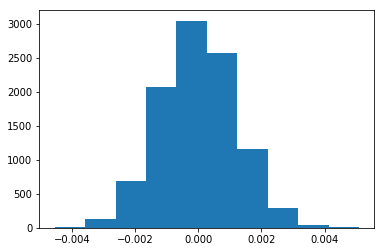

In [26]:
# what do I expect? this should be a normal distribution centered at 0.
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
actual_diff = treatment_df.converted.mean() - control_df.converted.mean()
p_diffs = np.array(p_diffs)
(p_diffs > actual_diff).mean()

0.9074

In [28]:
actual_diff

-0.0015782389853555567

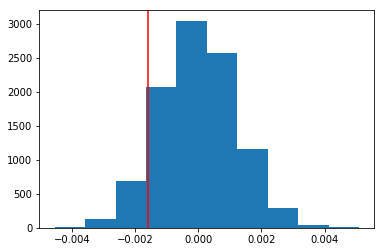

In [29]:
# also a visual to show the difference
# 90% of the cases are greater than the line
plt.hist(p_diffs)
plt.axvline(x=actual_diff,color='r');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Answer:
the value of 0.9051 is called the p-value. The p-value is the probability to observe a statistic assuming the null hypothesis is true ([reference][1]).

In our case, it means that assuming that the conversion rate for old and new pages is the same, we have a 90% chance of observing a difference of `actual_difference` which is -0.00015 (i.e old conversion rate is greater than the new).

In order to reject the null hypothesis, we needed a p-value less than 5%. Since this is not the case, we fail to reject the null and we keep the hypothesis that $p_{new} \le p_{old}$.


[1]:https://www.investopedia.com/terms/p/p-value.asp

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = control_df.converted.sum()
convert_new = treatment_df.converted.sum()
n_old = control_df.shape[0]
n_new = treatment_df.shape[0]
(convert_old, convert_new, n_old, n_new)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
from statsmodels.stats.proportion import proportions_ztest as pzt
count = np.array([convert_new,convert_old])
nobs = np.array([n_new,n_old])
# the only way to make this works is using "alternative" = "larger" (meaning: p_new  > p_old)
# taken from the documentation: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
# also the link above doesnt work
stat, pval = pzt(count,nobs,alternative='larger')
stat,pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### Answer:

The z-score is a measure of standard deviations. For instance, the value of -1.31 means we are 1.31 standard deviations away from the mean (to the left). The p-value, as mentioned before, is the measure of the probability. The two values are linked to each other.

Here is another useful explanation from [arcgisdesktop][1]:

> To give an example: the critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations. The p-value associated with a 95% confidence level is 0.05. If your Z score is between -1.96 and +1.96, your p-value will be larger than 0.05, and you cannot reject your null hypothsis; the pattern exhibited is a pattern that could very likely be one version of a random pattern. If the Z score falls outside that range (for example -2.5 or +5.4), the pattern exhibited is probably too unusual to be just another version of random chance and the p-value will be small to reflect this. In this case, it is possible to reject the null hypothesis and proceed with figuring out what might be causing the statistically significant spatial pattern.

According to the above, since our z-value is between -1.96 and 1.96 and our p-value is greater than 5% we fail to reject the null hypothesis.

This result is consistent with the above method.

[1]:http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Answer:

Since we have a regression analysis with only two outputs, we use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept'] = 1
df2[['_','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('_',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:30:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

##### Answer:

The current p-value is 0.19. The difference is due to the fact that the probabilities are meausuring two different things in the 2 cases.

In the first case, it measures the probability that the null hypothesis can be rejected based on $p_{new} \le p_{old}$.In the second case, it means the probability that the ab_page can be 0. The alternative can be less than or greater than (different from zero).

In other words, in the first case the p-value obtained corresponds to a one-tailed test (less than or equal) while in the second case, the p-value corresponds to a two-tailed test. For that, the hypotheses of the second one should be as follows:

$$ H_0: p_{new} = p_{old} $$
$$ H_1: p_{new} \ne p_{old} $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Answer:
Since the ab_page doesn't seem to work, we need to consider other variables. For example, the time-stamp variable could be used to fit the data. 

However, there are several disadvantages of using more variables:

- It will make the computations more complex
- If we add higher order variables, it won't be as easy to interpret the results
- We get an increased risk of multi-collinearity (when one variable is linearly dependent on other variables)

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
model2 = sm.Logit(df_new['converted'],df_new[['intercept','US','UK']])
result2 = model2.fit();
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               1.521e-05
Time:                        23:30:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
### Fit Your Linear Model And Obtain the Results
model2 = sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page']])
result3 = model2.fit();
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               2.323e-05
Time:                        23:31:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [38]:
# lets look at the interaction between the country and ab_page
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
model4 = sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page','UK_ab_page','US_ab_page']])
result4 = model4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               3.482e-05
Time:                        23:31:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

Again, none of the variables seem to be statistically significant.

<a id='bonus'></a>
## Bonus Section

In this section, we will analyze the effect of time on the conversion rate of users.

<sub> N.B: This section is just for experimentation. </sub>

In [39]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [40]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['year'] = df2.timestamp.dt.year # won't be useful
df2['month'] = df2.timestamp.dt.month # also wasn't useful (all data is in january)
df2['day'] = df2.timestamp.dt.day
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,year,month,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,2017,1,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,2017,1,12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2017,1,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2017,1,8
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,2017,1,21


In [41]:
# split the day into weekday and weekend
# after looking at the month of january,2017 we can see which days are weekdays and which are weekends
weekends = [6,7,13,14,20,21,27,28]
# the column will be 1 if its a weekend or 0 if it is a weekday
df2['weekend'] = df2.day.apply(lambda x: 1 if x in weekends else 0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,year,month,day,weekend
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,2017,1,21,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,2017,1,12,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2017,1,11,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2017,1,8,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,2017,1,21,1


In [42]:
# lets explore this variable
weekend_conversion = df2.query('weekend == 1').converted.mean()
weekday_conversion = df2.query('weekend ==0').converted.mean()
weekend_conversion, weekday_conversion

(0.11875906425373604, 0.11991159028629034)

In [43]:
# now lets fit a model to see if there is any statistical significance

model_t = sm.Logit(df2['converted'],df2[['intercept','weekend']])
result = model_t.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               3.423e-06
Time:                        23:32:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3934
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9933      0.007   -297.644      0.000      -2.006      -1.980
weekend       -0.0110      0.013     -0.853      0.394      -0.036       0.014
==============================================================================
"""

It seems that we have wasted our time here!

<a id='conclusions'></a>
## Conclusions

In this report, we analyzed the statistical and practical significance of the conversion rate by different methods. We concluded that the new page should not be used as we do not have any evidence that it will increase conversions.

<a id="references"></a>
## References

1. [Investopedia](https://www.investopedia.com/terms/p/p-value.asp)
2. [Arcgis Desktop Documentation](http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm)
3. [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
4. [StatsModel Documentation](https://www.statsmodels.org/stable/index.html)
5. [Udacity Data analysis course](https://udacity.com/)